### House Price Prediction

                                            Business Problem Statement

If we see housing.com we can see all the houses listed with different prices and all t he features which is available.it makes us easy to shortlist which areas to look after, what will be the price, how the features and ammenities of the house will affect the price of the house and then we can decide which house to purchase.

Housing prices is an important factor for the real estate sector, it is important to both the parties alike as it reflects the market trends in the sector.

In websites as well as through agents wesee lot of discrepencies and hike up in terms of pricing of a house and there are some cases when similar houses are priced differently and thus there is lot of in-transparency. Proper and justified prices of properties can bring in a lot of transparency and trust back to the real estate industry, which is very important as for most consumers

The application of the algorithm will help the business to predict the prices with maximum accuracy by taking some input variables.

Description : This is a notebook for prediction of KC House Price Dataset.

#### OBJECTIVE

To predict the sale prices for the houses in King County

#### Importing Libraries

First lets import all the libraries that will be used to load datasets and do data manipulation.


In [9]:
# Import libraries

# Pandas 
import pandas as pd
from pandas import Series,DataFrame 

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model

#### Reading Data Set

In [10]:
import os

In [11]:
pwd

'C:\\Users\\Sanketh\\Desktop'

In [12]:
os.chdir('C:\\Users\\Sanketh\\Desktop')

In [13]:

# Get Data in Dataframe 
df = pd.read_csv('C:\\Users\\Sanketh\\Desktop\\wk3_kc_house_train_data.csv')
df_val = pd.read_csv('C:\\Users\\Sanketh\\Desktop\\wk3_kc_house_valid_data.csv')



Preview of Data

In [14]:
# head() shows the first 5 rows of the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [15]:
df.describe() #Describing the data and analyzing the statistical parameters

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


By observing the data we can see that the PRICE is dependent on various features

In [17]:
#Checking data Type

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
id               9761 non-null int64
date             9761 non-null object
price            9761 non-null float64
bedrooms         9761 non-null int64
bathrooms        9761 non-null float64
sqft_living      9761 non-null int64
sqft_lot         9761 non-null int64
floors           9761 non-null float64
waterfront       9761 non-null int64
view             9761 non-null int64
condition        9761 non-null int64
grade            9761 non-null int64
sqft_above       9761 non-null int64
sqft_basement    9761 non-null int64
yr_built         9761 non-null int64
yr_renovated     9761 non-null int64
zipcode          9761 non-null int64
lat              9761 non-null float64
long             9761 non-null float64
sqft_living15    9761 non-null int64
sqft_lot15       9761 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.6+ MB


There are 9761 Entries in Train Dataset with 21 Columns

### DATA Manipulation and Data Visualization

In [19]:
# Checking null values in the dataset
# NO NULL VALUES
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no Null Values

#### Finding the counts of bedroom,waterfront,grade and condition

In [20]:
df.bedrooms.value_counts()

3     4417
4     3094
2     1255
5      755
6      116
1       88
7       17
8        7
0        6
9        3
11       1
10       1
33       1
Name: bedrooms, dtype: int64

we can see that the maximum bedroom is 33. will check that variable as it is anamoly.


In [21]:
print(df[df['bedrooms'] == 33])

              id             date     price  bedrooms  bathrooms  sqft_living  \
7204  2402100895  20140625T000000  640000.0        33       1.75         1620   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7204      6000     1.0           0     0  ...      7        1040   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7204            580      1947             0    98103  47.6878 -122.331   

      sqft_living15  sqft_lot15  
7204           1330        4700  

[1 rows x 21 columns]


The price of the house seems to be very less compared to the number of bedrooms. The bathroom count also looks odd. 
maybe this entry was not done properly , instead of 33 it might have actually been 3.


In [22]:

# Fix typo for bedrooms
df.loc[7204, 'bedrooms'] = 3

In [23]:
df.waterfront.value_counts()

0    9679
1      82
Name: waterfront, dtype: int64

In [24]:
df.grade.value_counts()

7     4067
8     2707
9     1192
6      914
10     532
11     172
5      107
12      45
4       17
13       7
1        1
Name: grade, dtype: int64

In [25]:
df.condition.value_counts()

3    6291
4    2610
5     772
2      78
1      10
Name: condition, dtype: int64

In [26]:
#### Using SNS to Plot

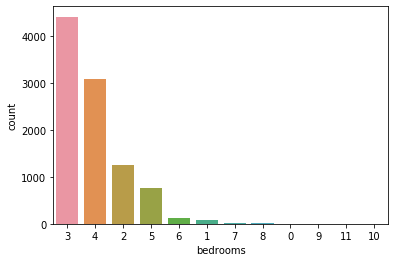

In [27]:
## using seaborn a count plot is plotted for the bedrooms 
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)

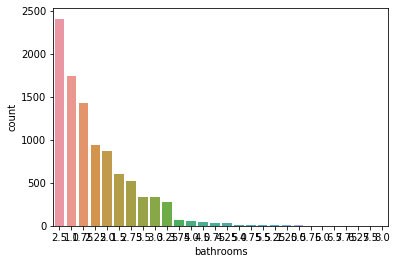

In [28]:
## using seaborn a count plot is plotted for the bathrooms 
sns.countplot(df.bathrooms,order=df['bathrooms'].value_counts().index)


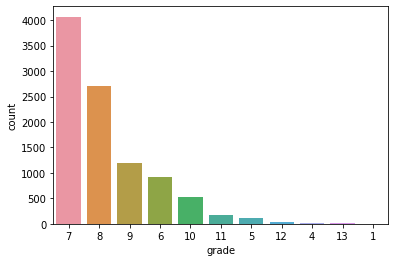

In [30]:
## using seaborn a count plot is plotted for the grade 
sns.countplot(df.grade,order=df['grade'].value_counts().index)

No handles with labels found to put in legend.


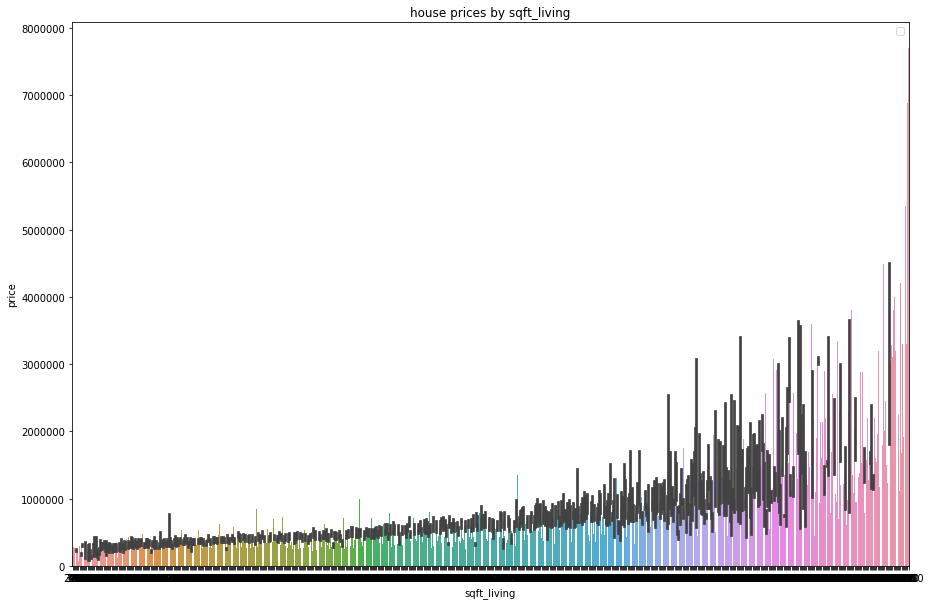

In [32]:

#Using Seaborn,A barplot is plotted between the sqft living and prices to see how the price changes with the sqft living.

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_living")
plt.xlabel('sqft_living')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_living',y='price',data=df)

No handles with labels found to put in legend.


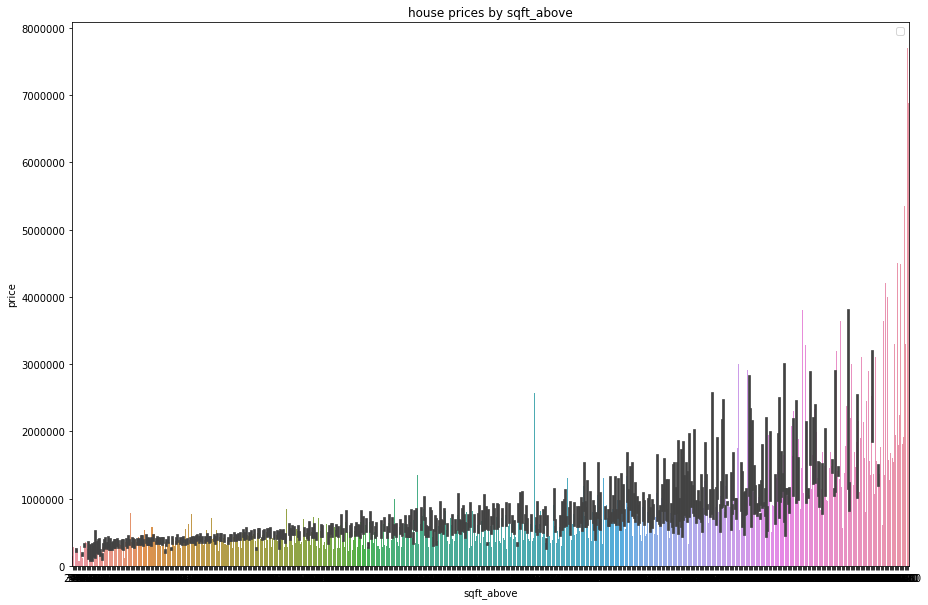

In [37]:

#Using Seaborn,A barplot is plotted between the sqft_above and prices to see how the price changes with the sqft_above.

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=df)

#### Scatter Plot for all the features with respect to Price

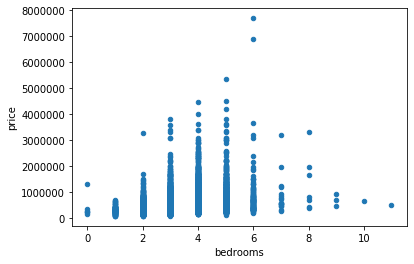

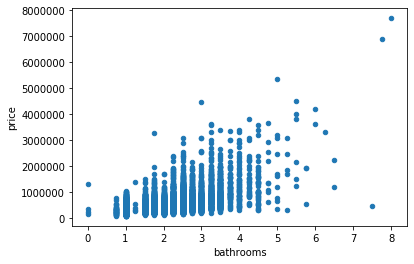

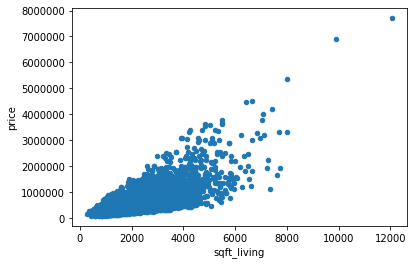

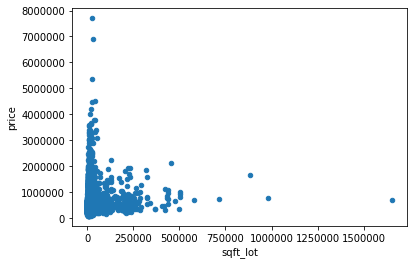

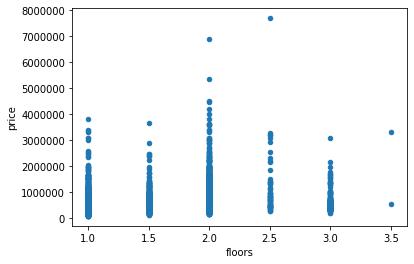

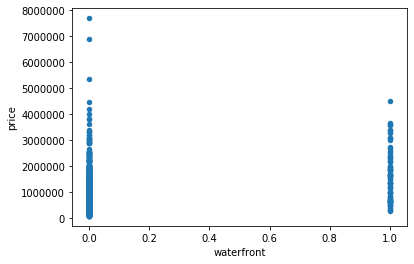

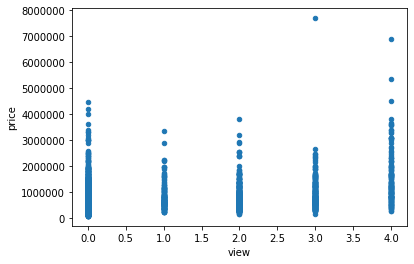

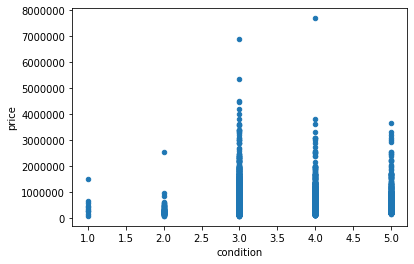

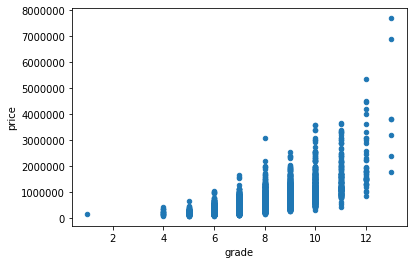

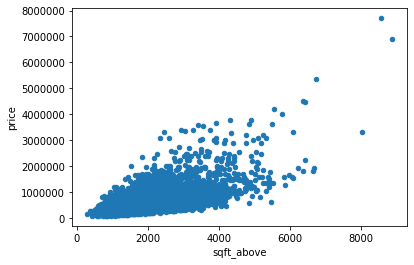

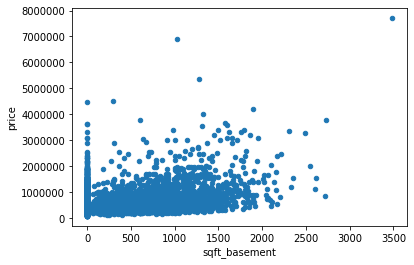

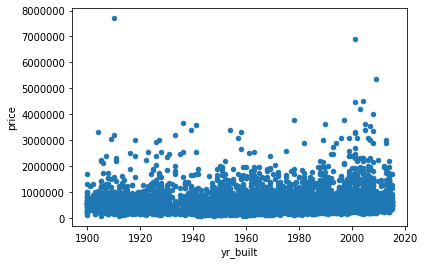

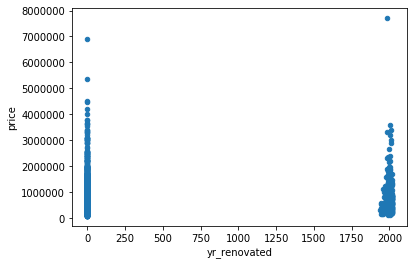

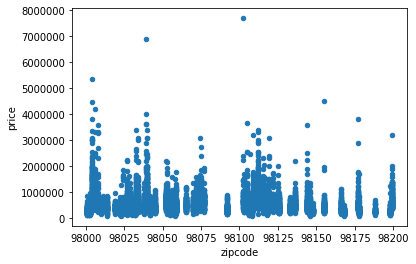

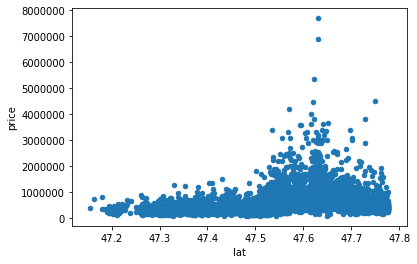

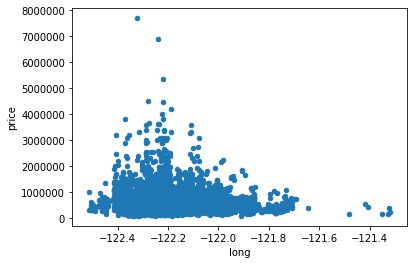

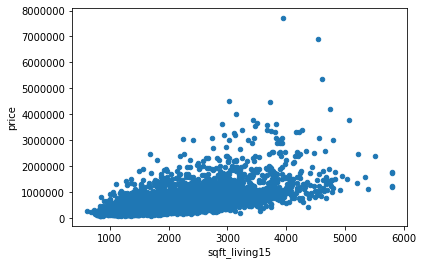

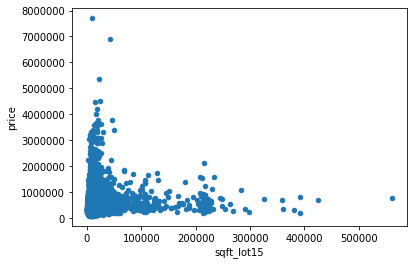

In [41]:
for i in df.iloc[:,2:]:
    if i=='price':continue
    df.plot(kind='scatter',x=i,y='price')

In [39]:
#histogram is plotted for Sqft_living 

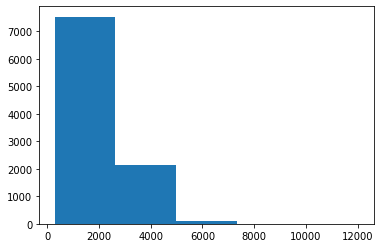

In [40]:
plt.hist('sqft_living',data=df,bins=5)
plt.show()

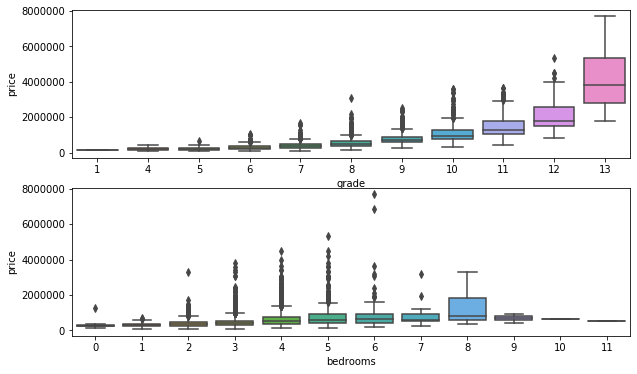

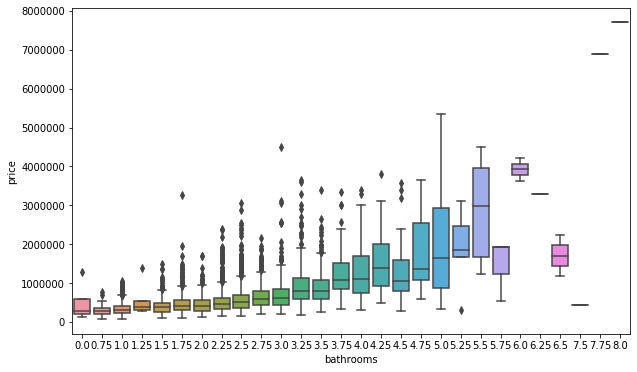

In [42]:
fig,ax=plt.subplots(2,1,figsize=(10,6))
sns.boxplot(x=df['grade'],y=df['price'],ax=ax[0])
sns.boxplot(x=df['bedrooms'],y=df['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x=df['bathrooms'],y=df['price'])

C:\Users\Sanketh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


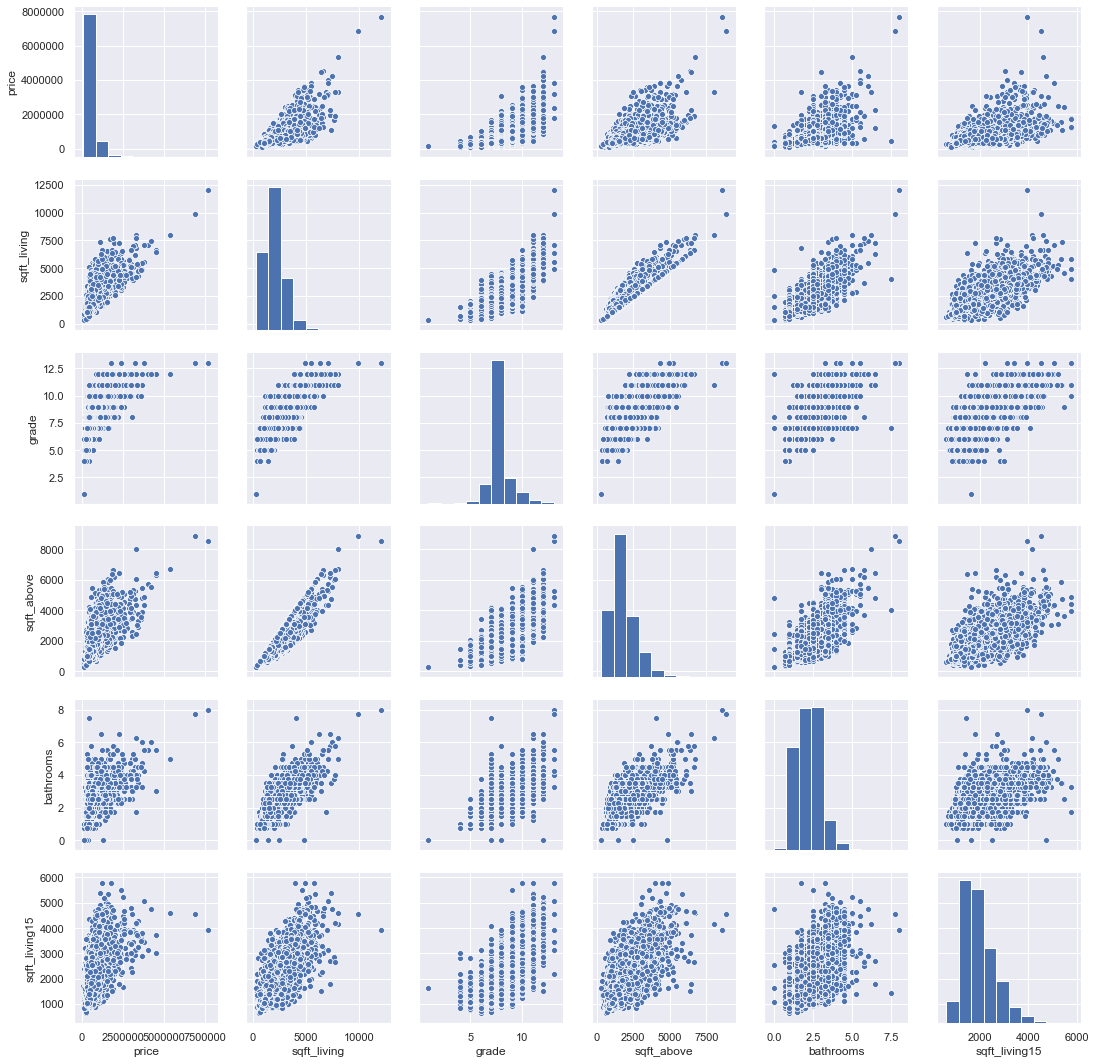

In [43]:
sns.set()
cols = df[['price','sqft_living','grade','sqft_above','bathrooms','sqft_living15']]
sns.pairplot(cols, size = 2.5)

In [44]:
#using distplot to check the skewness of sqft_living and sqft_above

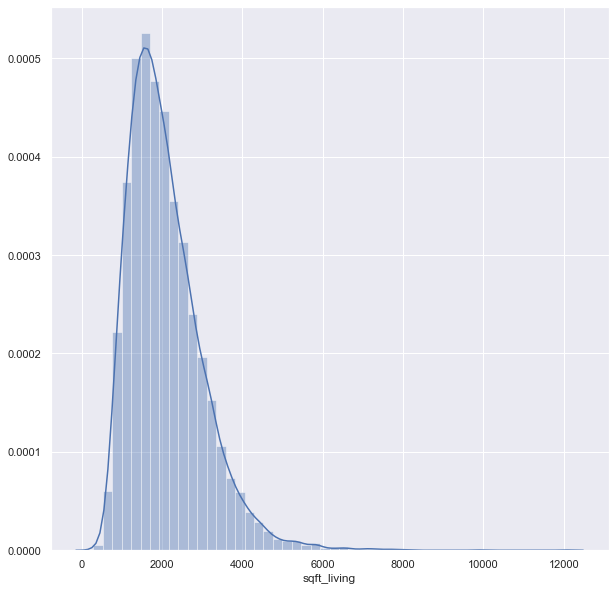

In [45]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

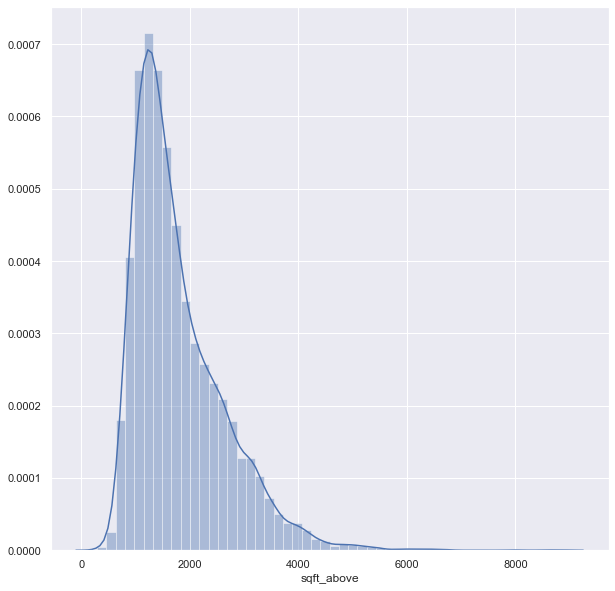

In [46]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
sns.distplot(df['sqft_above'],hist=True,kde=True,rug=False,label='sqft_above',norm_hist=True)


In [47]:
print('The skewness of the variable sqft_living is',df['sqft_living'].skew())
print('The skewness of the variable sqft_above is',df['sqft_above'].skew())

The skewness of the variable sqft_living is 1.425825591484237
The skewness of the variable sqft_above is 1.4527483169440447


In [48]:
print('Mean',round(df['sqft_living'].mean(),2))
print('Median',df['sqft_living'].median())
print('Mode',df['sqft_living'].mode()[0])


Mean 2086.73
Median 1910.0
Mode 1560


In [49]:
len(df[df['sqft_living']==1560])

68

we can observe that sqft_living = 1560 has more no. of values.

In [50]:
#using distplot to check the skewness of Price

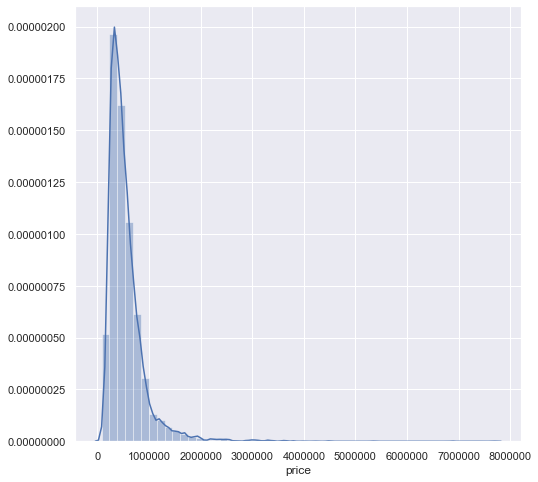

In [52]:
plt.figure(figsize = (8,8))
sns.distplot(df['price'])

In [53]:
## using seaborn, Plotting a heat map to see all the relation between the variables.

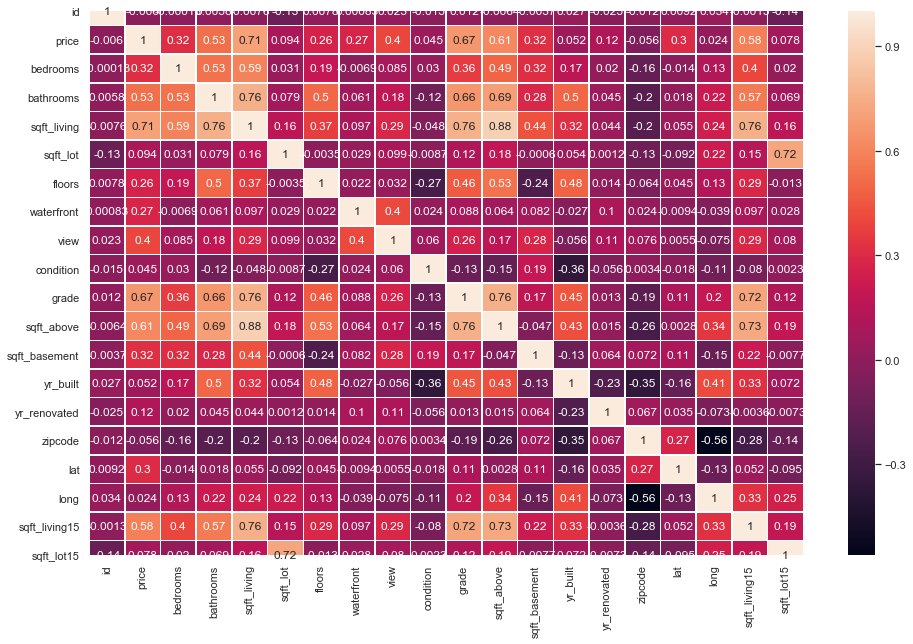

In [54]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot = True, linewidth=.5)

#this corr map is used to find the correlation between the attributes and the pricing so as to 
#get an idea about the relationship between them.

Location is key when it comes to real estate. 
Our first question seeks to understand the geographical distribution of the homes in our dataset and determine where the highest house sales were recorded.
graphical distribution of the homes in our dataset and determine where the highest house sales were recorded.

In [55]:
# Create a copy to manipulate
dfq1 = df.copy()

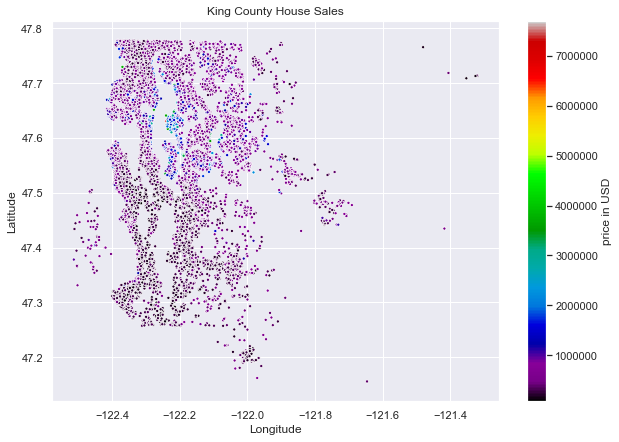

In [56]:
# Plot scatter plot
plt.figure(figsize = (10,7))
ax = sns.scatterplot(x = dfq1['long'], y = dfq1['lat'], hue = dfq1['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = dfq1)

norm = plt.Normalize(dfq1['price'].min(), dfq1['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

From this visualisation we can already draw initial insights based on the houses' geographical locations. The highest house prices are concentrated in the area with latitude around 47.6 and longitude around -122.25. There is a disparity with southern locations achieving lower house prices.

#### House prices per Zipcode

Let us now focus on zipcode information, which was provided as part of our starting data.

In [57]:

# Explore zipcode
dfq1['zipcode'].value_counts()

98115    278
98052    264
98034    257
98103    257
98117    257
        ... 
98010     48
98109     44
98024     37
98148     26
98039     20
Name: zipcode, Length: 70, dtype: int64


We see that there are 70 unique zipcodes represented in our dataset.

### WaterFront Feature


From the maps, it is apparent that being on the waterfront is highly sought after and many of the most expensive houses in our dataset have this feature. We have been provided with a waterfront feature, which characterises houses which have a view of a waterfront. Let us investigate how this feature relates to price by using a boxplot.



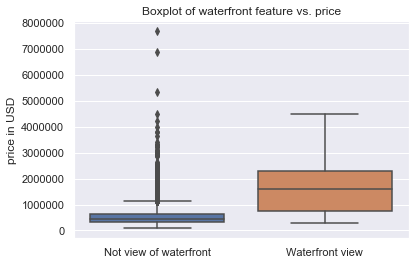

In [58]:
# Plot boxplot of waterfront feature
sns.boxplot(x = dfq1['waterfront'], y = dfq1['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [59]:
waterfrontmean = dfq1[dfq1['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = dfq1[dfq1['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

The mean house price for a house with waterfront view is USD 1676507.93
The mean house price for a house without waterfront view is USD 533129.68


In [60]:

len(dfq1[dfq1['waterfront'] == 1])/len(dfq1)*100

0.8400778608749104

The mean house price for houses with a waterfront view is almost Triple that of those without this feature. However note that only 0.84% of properties in our dataset have a waterfront view.

### Conclusion

Waterfront living is key, with the median house price for a house with a waterfront view being almost Triple that of one that does not have this feature.

Location within King County is important with a huge disparity amongst zipcodes.

### Overview of the Box Plots


Let us get an initial understanding of the categorical features' relationship with price using boxplots.

In [61]:

# Create a copy of df to manipulate
dfq2 = df.copy()

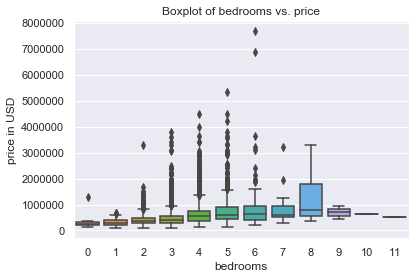

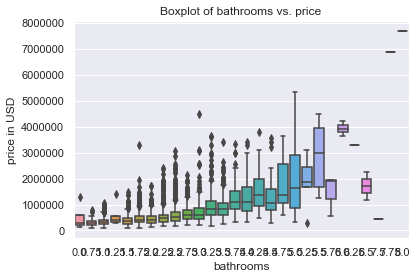

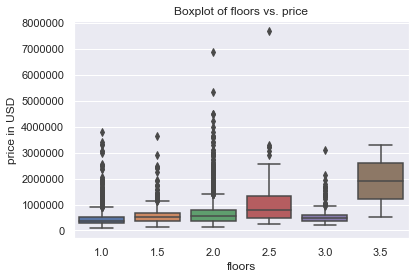

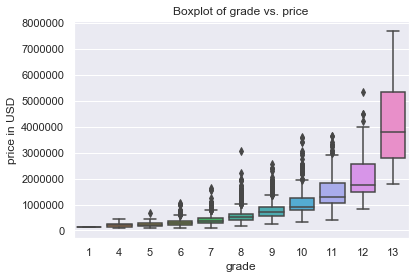

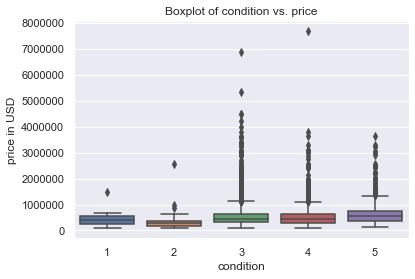

In [62]:

# Define categorical variables
catfeats = ['bedrooms', 'bathrooms', 'floors', 'grade', 'condition']

# Plot boxplots
for feature in catfeats:
    sns.boxplot(x = dfq2[feature], y = dfq2['price'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()


From these visualisations:

it is immediately apparent that as bedrooms and bathrooms increase, so does the house's selling price.

more floors is preferable up to 2.5 (pressumably the 0.5 is due to a mezzanine) however a house with 3 floors has a lower median price.

grade looks to be a good predictor of price and worth exploring further


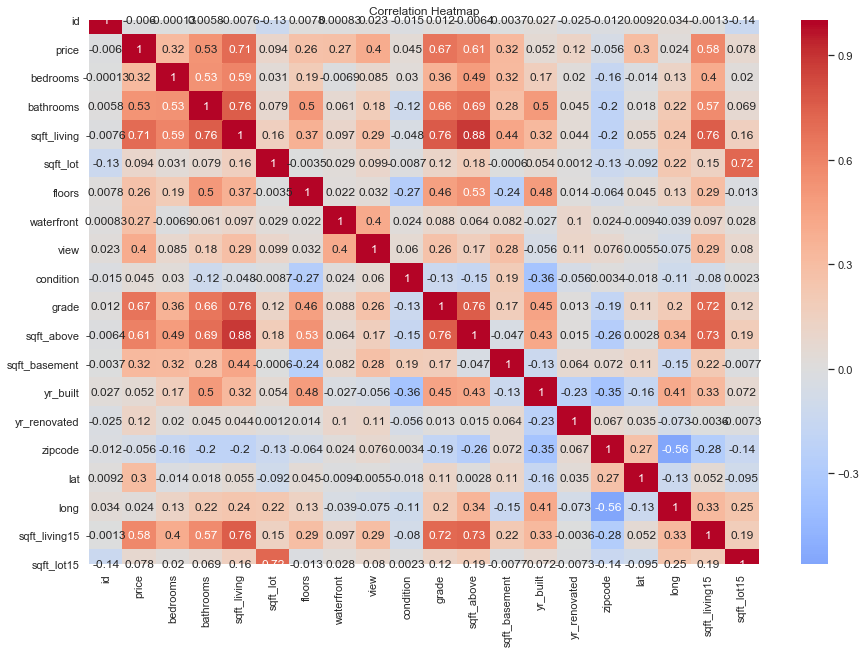

In [63]:

# Correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As expected there are some multicollinearity issues which we need to address.

We note that sqft_above and sqft_living are highly positively correlated, which is expected as sqft_above is the square footage of the house apart from basement (and we saw earlier that most houses did not have a basement). We will choose to keep sqft_living as it encompasses more information and drop the sqt_above feature. We also see that sqft_living15 is moderately highly correlated with sqft_living and so we will drop this feature too.

We also note that sqft_lot and sqft_lot15 are highly positively correlated and we will choose to keep sqft_lot as it relates directly to the house as opposed to its neighbours (and so potentially easier to obtain data for and generalise.)

In [64]:
def drop_corrfeats(df):
    '''Drop features which appear correlated'''
    df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
    return df


In [65]:
# Drop multicollinear features
df = drop_corrfeats(df)

In [66]:
# Save a csv copy
df.to_csv('dfcleaned.csv')

In [67]:

# View head
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,1530,2001,0,98053,47.6561,-122.005
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,300,1942,0,98115,47.6900,-122.292
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,0,1927,0,98028,47.7558,-122.229
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,0,1977,0,98074,47.6127,-122.045


In [70]:
def drop_corrfeats(df_val):
    '''Drop features which appear correlated'''
    df_val = df_val.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
    return df


In [71]:
# Drop multicollinear features
df_val = drop_corrfeats(df_val)

KeyError: "['sqft_above' 'sqft_living15' 'sqft_lot15'] not found in axis"

In [72]:
# Save a csv copy
df_val.to_csv('df_val_cleaned.csv')

In [73]:
df_val.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,1530,2001,0,98053,47.6561,-122.005
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,300,1942,0,98115,47.6900,-122.292
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,0,1927,0,98028,47.7558,-122.229
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,0,1977,0,98074,47.6127,-122.045


## Simple Linear Regression

In [74]:
reg= linear_model.LinearRegression()
x_train= np.array(df['sqft_living']).reshape(-1,1)
y_train=np.array(df['price']).reshape(-1,1)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
x_valid=np.array(df_val['sqft_living']).reshape(-1,1)
y_valid=np.array(df_val['price']).reshape(-1,1)
pred=reg.predict(x_valid)
print('LINEAR MODEL')
mean_squared_error=metrics.mean_squared_error(y_valid,pred)
print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error),2))
print('R squared training:',round(reg.score(x_train,y_train),3))
print('R squared Validation:',round(reg.score(x_valid,y_valid),3) )
print('Intercept:',reg.intercept_)
print('Coefficient:',reg.coef_)

LINEAR MODEL
Root Mean Squared Error: 269130.24
R squared training: 0.497
R squared Validation: 0.497
Intercept: [-59493.31716521]
Coefficient: [[288.59846375]]


#### R Squared value: 0.497

Intercept: -59493.31716521, Coefficient: 288.59846375,R2 value: 0.497,

We can interpret above results as , the increase in 1 sqft area of house will increse the price of house by 288.59 USD

The root mean square error is found to be 269130.24

#### R2 value = 0.497


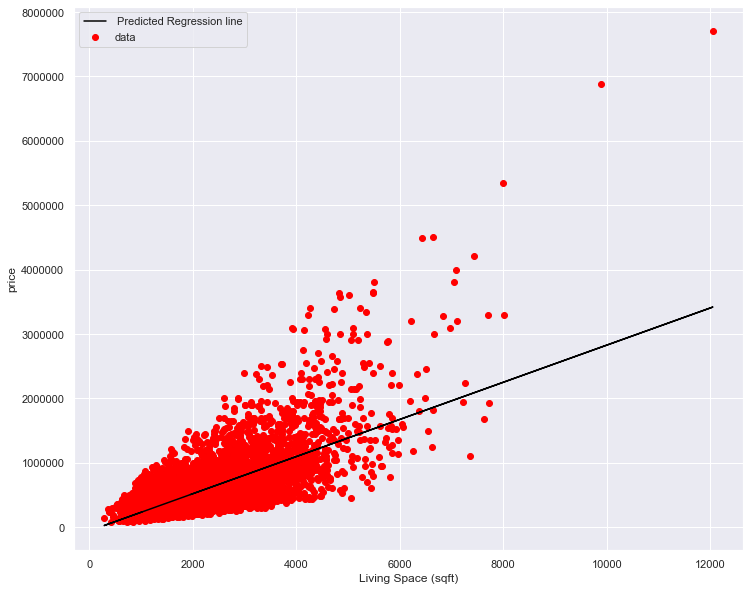

In [78]:

_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_valid, y_valid, color= 'red', label = 'data')
plt.plot(x_valid, reg.predict(x_valid), color='black', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()

plt.show()

### Multiple Linear Regression

#### Model 1

In [82]:
df1 = pd.read_csv("dfcleaned.csv")
df_val1 =  pd.read_csv("df_val_cleaned.csv")


In [83]:
df1.columns

Index(['sr.no', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [84]:


df1['price_log'] = np.log(df1.price)
df1['sqft_living_log'] = np.log(df1.sqft_living)
df1['sqft_lot_log'] = np.log(df1.sqft_lot)


In [85]:
df_val1['price_log'] = np.log(df_val1.price)
df_val1['sqft_living_log'] = np.log(df_val1.sqft_living)
df_val1['sqft_lot_log'] = np.log(df_val1.sqft_lot)

In [88]:

unwanted = ['sr.no','id','date','price','sqft_living','sqft_lot','yr_built','yr_renovated','zipcode','lat','long']
df1.drop(unwanted,axis=1,inplace=True)

KeyError: "['sr.no' 'id' 'date' 'price' 'sqft_living' 'sqft_lot' 'yr_built'\n 'yr_renovated' 'zipcode' 'lat' 'long'] not found in axis"

In [89]:

unwanted = ['sr.no','id','date','price','sqft_living','sqft_lot','yr_built','yr_renovated','zipcode','lat','long']
df_val1.drop(unwanted,axis=1,inplace=True)


In [91]:

df1.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'price_log', 'sqft_living_log',
       'sqft_lot_log'],
      dtype='object')

In [92]:
df_val1.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_basement', 'price_log', 'sqft_living_log',
       'sqft_lot_log'],
      dtype='object')

In [95]:

X = df1.drop(["price_log"], axis = 1)
y = df1['price_log']

In [96]:

X_val = df_val1.drop(["price_log"], axis = 1)
y_val = df_val1['price_log']

In [97]:
reg= linear_model.LinearRegression()
reg.fit(X,y)
pred = reg.predict(X_val)
print('MULTI LINEAR REGRESSION MODEL')
mean_squared_error = metrics.mean_squared_error(np.exp(y_val), np.exp(pred))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(X,y), 3))
print('R-squared (Validation) ', round(reg.score(X_val,y_val), 3))

MULTI LINEAR REGRESSION MODEL
Root Mean Squared Error (RMSE)  224921.49
R-squared (training)  0.604
R-squared (Validation)  0.604


#### R sqaured Value = 0.604

### MODEL 2

In [98]:
df2 = pd.read_csv("dfcleaned.csv")
df_val2 =  pd.read_csv("df_val_cleaned.csv")

In [99]:
df2['price_log'] = np.log(df2.price)

In [100]:
df_val2['price_log'] = np.log(df_val2.price)

In [102]:
unwanted = ['sr.no','id','date','price','yr_built','yr_renovated','zipcode','lat','long']
df2.drop(unwanted,axis=1,inplace=True)

In [103]:
unwanted = ['sr.no','id','date','price','yr_built','yr_renovated','zipcode','lat','long']
df_val2.drop(unwanted,axis=1,inplace=True)

In [104]:
X2 = df2.drop(["price_log"], axis = 1)
y2 = df2['price_log']

In [105]:
X_val2 = df_val2.drop(["price_log"], axis = 1)
y_val2 = df_val2['price_log']

In [107]:

reg2= linear_model.LinearRegression()
reg2.fit(X2,y2)
pred2 = reg2.predict(X_val2)
print('MULTI LINEAR REGRESSION MODEL')
mean_squared_error = metrics.mean_squared_error(np.exp(y_val2), np.exp(pred2))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg2.score(X2,y2), 3))
print('R-squared (Validation) ', round(reg2.score(X_val2,y_val2), 3))

MULTI LINEAR REGRESSION MODEL
Root Mean Squared Error (RMSE)  222221.77
R-squared (training)  0.605
R-squared (Validation)  0.605


#### R sqaured Value = 0.605

### Model 3

In [110]:
df3 = pd.read_csv("dfcleaned.csv")
df_val3 =  pd.read_csv("df_val_cleaned.csv")

In [111]:
df3['age'] = 2020 - df3.yr_built
df3['price_log'] = np.log(df3.price)
df3['sqft_living_log'] = np.log(df3.sqft_living)
df3['sqft_lot_log'] = np.log(df3.sqft_lot)


In [112]:
df_val3['age'] = 2020 - df_val3.yr_built
df_val3['price_log'] = np.log(df_val3.price)
df_val3['sqft_living_log'] = np.log(df_val3.sqft_living)
df_val3['sqft_lot_log'] = np.log(df_val3.sqft_lot)


In [113]:
sort = df3['sqft_basement'] >= 1
df3.loc[sort, 'sqft_basement_bin'] = 1

sort = df3['sqft_basement'] < 1
df3.loc[sort, 'sqft_basement_bin'] = 0

In [114]:

mask = df_val3['sqft_basement'] >= 1
df_val3.loc[mask, 'sqft_basement_bin'] = 1

mask = df_val3['sqft_basement'] < 1
df_val3.loc[mask, 'sqft_basement_bin'] = 0

In [115]:
unwanted = ['sr.no','id','date','price','sqft_living','sqft_lot','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
df3.drop(unwanted,axis=1,inplace=True)

In [116]:
unwanted = ['sr.no','id','date','price','sqft_living','sqft_lot','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
df_val3.drop(unwanted,axis=1,inplace=True)

In [117]:

df3.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'age', 'price_log', 'sqft_living_log', 'sqft_lot_log',
       'sqft_basement_bin'],
      dtype='object')

In [118]:

X3 = df3.drop(["price_log"], axis = 1)
y3 = df3['price_log']

In [119]:

X_val3 = df_val3.drop(["price_log"], axis = 1)
y_val3 = df_val3['price_log']

In [120]:
reg3= linear_model.LinearRegression()
reg3.fit(X3,y3)
pred3 = reg3.predict(X_val3)
print('MULTI LINEAR REGRESSION MODEL')
mean_squared_error = metrics.mean_squared_error(np.exp(y_val3), np.exp(pred3))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg3.score(X3,y3), 3))
print('R-squared (Validation) ', round(reg3.score(X_val3,y_val3), 3))

MULTI LINEAR REGRESSION MODEL
Root Mean Squared Error (RMSE)  202461.33
R-squared (training)  0.662
R-squared (Validation)  0.662


### R Squared Value = 0.662

### Model 04

In [121]:
df4 = pd.read_csv("dfcleaned.csv")
df_val4 =  pd.read_csv("df_val_cleaned.csv")

In [122]:

df4['price_log'] = np.log(df4.price)
df4['sqft_living_log'] = np.log(df4.sqft_living)
df4['sqft_lot_log'] = np.log(df4.sqft_lot)


In [123]:

df_val4['price_log'] = np.log(df_val4.price)
df_val4['sqft_living_log'] = np.log(df_val4.sqft_living)
df_val4['sqft_lot_log'] = np.log(df_val4.sqft_lot)


In [124]:
sort = df4['sqft_basement'] >= 1
df4.loc[sort, 'sqft_basement_bin'] = 1

sort = df4['sqft_basement'] < 1
df4.loc[sort, 'sqft_basement_bin'] = 0

In [126]:

mask = df_val4['sqft_basement'] >= 1
df_val4.loc[mask, 'sqft_basement_bin'] = 1

mask = df_val4['sqft_basement'] < 1
df_val4.loc[mask, 'sqft_basement_bin'] = 0

In [127]:
zipcode_dummy = pd.get_dummies(df4['zipcode'])

In [128]:

zipcode_dummy1 = pd.get_dummies(df_val4['zipcode'])

In [129]:

df5 = pd.concat([df4, zipcode_dummy], axis=1)

In [130]:

df_val5 = pd.concat([df_val4, zipcode_dummy1], axis=1)

In [131]:
unwanted = ['sr.no','id','date','price','bedrooms','bathrooms','floors','condition','sqft_living','sqft_lot','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
df5.drop(unwanted,axis=1,inplace=True)

In [132]:
unwanted = ['sr.no','id','date','price','bedrooms','bathrooms','floors','condition','sqft_living','sqft_lot','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
df_val5.drop(unwanted,axis=1,inplace=True)

In [133]:

X4 = df5.drop(["price_log"], axis = 1)
y4 = df5['price_log']

In [134]:
X_val4 = df_val5.drop(["price_log"], axis = 1)
y_val4 = df_val5['price_log']

In [135]:
reg4= linear_model.LinearRegression()
reg4.fit(X4,y4)
pred4 = reg4.predict(X_val4)
print('MULTI LINEAR REGRESSION MODEL')
mean_squared_error = metrics.mean_squared_error(np.exp(y_val4), np.exp(pred4))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg4.score(X4,y4), 3))
print('R-squared (Validation) ', round(reg4.score(X_val4,y_val4), 3))

MULTI LINEAR REGRESSION MODEL
Root Mean Squared Error (RMSE)  138445.04
R-squared (training)  0.88
R-squared (Validation)  0.88


### R sqaured Value 0.88

### Multivariate Regression we Observe that Model 4 is the best solution of the solved models.

### Testing on Multivariate Regression Model 4

In [136]:

df_test = pd.read_csv("wk3_kc_house_test_data.csv")

In [137]:

df_test['price_log'] = np.log(df_test.price)
df_test['sqft_living_log'] = np.log(df_test.sqft_living)
df_test['sqft_lot_log'] = np.log(df_test.sqft_lot)


In [138]:
sort = df_test['sqft_basement'] >= 1
df_test.loc[sort, 'sqft_basement_bin'] = 1

sort = df_test['sqft_basement'] < 1
df_test.loc[sort, 'sqft_basement_bin'] = 0

In [139]:
sort = df_test['sqft_basement'] >= 1
df_test.loc[sort, 'sqft_basement_bin'] = 1

sort = df_test['sqft_basement'] < 1
df_test.loc[sort, 'sqft_basement_bin'] = 0

In [140]:
zipcode_dummy2 = pd.get_dummies(df_test['zipcode'])

In [141]:
df_test = pd.concat([df_test, zipcode_dummy2], axis=1)

In [142]:
unwanted = ['id','date','price','bedrooms','bathrooms','floors','condition','sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']
df_test.drop(unwanted,axis=1,inplace=True)

In [143]:
X_test = df_test.drop(["price_log"], axis = 1)
y_test = df_test['price_log']

In [145]:
pred4 = reg4.predict(X_test)
print('MULTI LINEAR REGRESSION MODEL')
mean_squared_error = metrics.mean_squared_error(np.exp(y_test), np.exp(pred4))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (Testing) ', round(reg4.score(X_test,y_test), 3))

MULTI LINEAR REGRESSION MODEL
Root Mean Squared Error (RMSE)  129106.21
R-squared (Testing)  0.869


### R Squared Value (TEST): 0.869

So we get accuracy of approximately 87% , further process and feature engineering can be done to increase the acurracy and to see how it plays the role of predicting the house sales price.